In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

data = pd.read_csv ('/content/winequality-red.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality num,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


In [ ]:
classLabel="quality num"
data2 = data.drop(classLabel, axis = 1)

In [ ]:
ClassLabel="quality"
dataFeatures = data2.drop(ClassLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r-1]

In [ ]:
dataPhenotypes = data[ClassLabel].values
dataPhenotypes= dataPhenotypes[:r-1]

In [ ]:
dataPhenotypes

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Bad'], dtype=object)

In [ ]:
dataFeatures_train, dataFeatures_test, dataPhenotypes_train, dataPhenotypes_test = train_test_split(dataFeatures, dataPhenotypes, stratify=dataPhenotypes, random_state=1)

In [ ]:
DataPhenotypes_train=LabelBinarizer().fit_transform(dataPhenotypes_train)
DataPhenotypes_test=LabelBinarizer().fit_transform(dataPhenotypes_test)  

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()

In [ ]:
#Please see the following website for reference
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

import numpy as np

# Number of hidden layers for the neural network
hidden_layer_sizes = [(10,),(5,5),(4,4,4),(3,3,3,3),(2,2,2,2,2)]

# activation function for neural network
#x=(a1)x1+(a2)x2+(a3)x3+....(an)(xn) 
#identity: f(x)=x
# logistic: f(x)=
# tanh:
# relu:
activation = ['logistic','tanh','relu']

# Maximum number of levels in tree
solver = ['lbfgs','sgd','adam']

# Minimum number of samples required to split a node
alpha = [0.0005, 0.001,0.005]

# Method of selecting samples for training each tree
learning_rate = ['constant', 'invscaling','adaptive']

# Number of features to consider at every split
power_t = [0.25, 0.5,0.75]

# Maximum number of levels in tree
max_iter = [500,1000,1500,2000]

# Method of selecting samples for training each tree
tol = [1e-5,1e-4,1e-3]

# Minimum number of samples required to split a node
n_iter_no_change = [10, 50, 100]


# Create the random grid
random_grid = {'hidden_layer_sizes': hidden_layer_sizes,
               'activation': activation,
               'solver': solver,
               'alpha': alpha,
               'learning_rate': learning_rate,
               'power_t': power_t,
               'max_iter': max_iter,
               'tol': tol,
               'n_iter_no_change': n_iter_no_change}
print(random_grid)

{'hidden_layer_sizes': [(10,), (5, 5), (4, 4, 4), (3, 3, 3, 3), (2, 2, 2, 2, 2)], 'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0005, 0.001, 0.005], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'power_t': [0.25, 0.5, 0.75], 'max_iter': [500, 1000, 1500, 2000], 'tol': [1e-05, 0.0001, 0.001], 'n_iter_no_change': [10, 50, 100]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_random= RandomizedSearchCV(estimator=model,param_distributions= random_grid, n_iter=100, cv = 3, verbose=2, n_jobs=-1)

In [ ]:
model_random.fit(dataFeatures_train,dataPhenotypes_train)
model_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'invscaling',
 'max_iter': 2000,
 'n_iter_no_change': 100,
 'power_t': 0.25,
 'solver': 'adam',
 'tol': 0.0001}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the random grid
param_grid = {
 'activation': ['relu'],
 'alpha': [0.005,0.001],
 'hidden_layer_sizes': [(10,),(5, 5)],
 'learning_rate': ['constant','invscaling'],
 'max_iter': [500,2000],
 'n_iter_no_change': [10,50,100],
 'power_t': [0.25,0.75],
 'solver': ['adam','lbfgs'],
 'tol': [1e-05,0.0001,0.001]}
print(param_grid)

{'activation': ['relu'], 'alpha': [0.005, 0.001], 'hidden_layer_sizes': [(10,), (5, 5)], 'learning_rate': ['constant', 'invscaling'], 'max_iter': [500, 2000], 'n_iter_no_change': [10, 50, 100], 'power_t': [0.25, 0.75], 'solver': ['adam', 'lbfgs'], 'tol': [1e-05, 0.0001, 0.001]}


In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_grid= GridSearchCV(estimator=model,param_grid= param_grid, cv = 3, verbose=2, n_jobs=-1)

In [ ]:
model_grid.fit(dataFeatures_train,dataPhenotypes_train)
model_grid.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'max_iter': 2000,
 'n_iter_no_change': 100,
 'power_t': 0.75,
 'solver': 'lbfgs',
 'tol': 0.001}

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(activation='relu',alpha=0.001, hidden_layer_sizes=(10,), learning_rate='constant',max_iter=2000, n_iter_no_change=100, power_t=0.75, solver='lbfgs',tol=0.001 )


TrainedModel=model.fit(dataFeatures_train,dataPhenotypes_train)

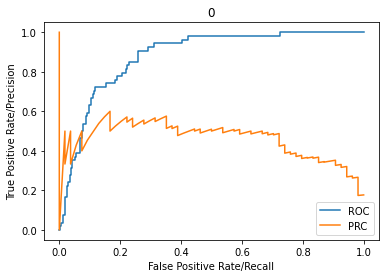

PRC AUC:0.45541328781874435
ROC AUC:0.880057803468208


<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = TrainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(DataPhenotypes_test, probs[:,1])
prec1, recall1, thresholds1 = precision_recall_curve(DataPhenotypes_test, probs[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()
plt.savefig("Vgg19CNNClass0.png")

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [ ]:
probs

array([[0.78933456, 0.21066544],
       [0.94290687, 0.05709313],
       [0.93223447, 0.06776553],
       ...,
       [0.89818655, 0.10181345],
       [0.76771004, 0.23228996],
       [0.94107418, 0.05892582]])

In [ ]:
DataPhenotypes_test[:,0]

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
DataPhenotypes_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
probs[:,0]

array([0.78933456, 0.94290687, 0.93223447, ..., 0.89818655, 0.76771004,
       0.94107418])